In [1]:
from lightkurve import TessLightCurve
from lightkurve.search import open 
from lightkurve.correctors import RegressionCorrector
import lightkurve as lk
import numpy as np

In [2]:
def findOrbitRadius(periodInDays, M):
    G = 6.67408 * (10 ** (-11))
    pi = 3.141592653589
    sunMassKG = 1.989 * (10**30)
    massKG = M * sunMassKG
    periodInSec = periodInDays * 24 * 3600
    return ((periodInSec * periodInSec*G*massKG)/4*pi*pi) ** (1. / 3)
def metersToAU(d):
    return d/(1.495978707*(10**11))

In [3]:
pixels = open("TIC165602000/tess2019226182529-s0015-0000000165602000-0151-s_tp.fits")
pixels.interact()

In [19]:
lc = open("TIC165602000/tess2019226182529-s0015-0000000165602000-0151-s_lc.fits").PDCSAP_FLUX.remove_outliers(sigma=10).normalize().remove_nans()

#lc = lk.search_lightcurvefile('KIC 165602000').download_all().PDCSAP_FLUX.stitch().remove_outliers(sigma=10).normalize().remove_nans()

In [15]:
#lc.query_solar_system_objects()

TIC 165602000 : Folding on period  5.589000000000364 d


<AxesSubplot:xlabel='Phase', ylabel='Normalized Flux'>

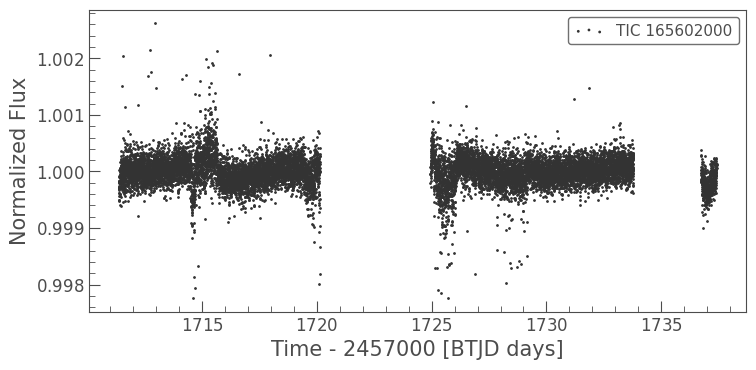

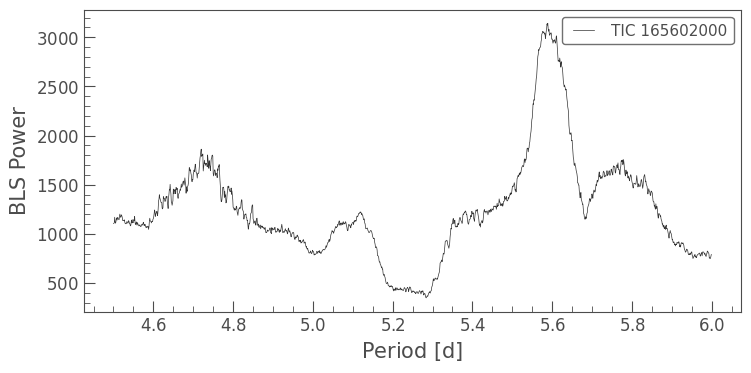

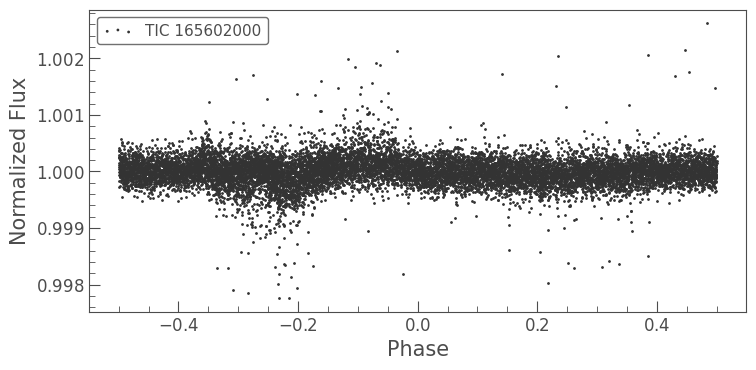

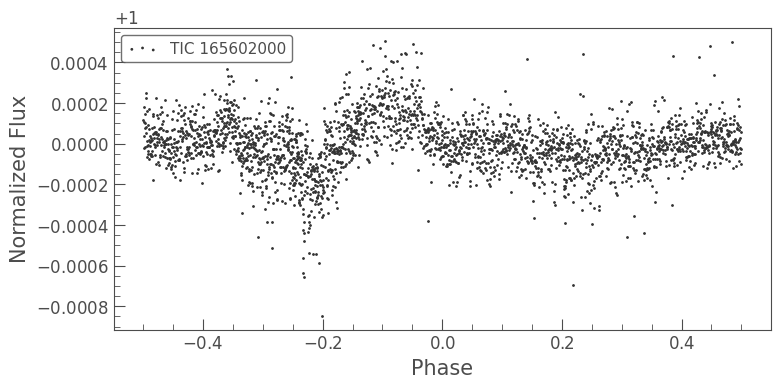

In [31]:
pg = lc.to_periodogram(method="bls", period=np.arange(4.5, 6, 0.001))
folded_lc = lc.fold(period=pg.period_at_max_power)
binned_lc = folded_lc.bin(binsize=5)  # Average 5 points per bin

lc.scatter()
pg.plot();
print(lc.label, ": Folding on period ", pg.period_at_max_power)
folded_lc.scatter()
binned_lc.scatter()

#orbitRadiusInMeters =  findOrbitRadius(pg.period_at_max_power, 0.402118)
#print("Orbit in meters: ", orbitRadiusInMeters)
#orbitInAU = metersToAU(orbitRadiusInMeters)
#print("Orbit in AU: ", orbitInAU)